## AIM:  
In this notebook we will try to setup OPEN AI's gym environment in our local System

### OPENAI Gym environment:
+ [Open AI GYM](https://gym.openai.com/)\
A toolkit for developing and comparing reinforcement learning algorithms. This python library gives us huge number of test environments to work on our RL agent’s algorithms with shared interfaces for writing general algorithms and testing them.
### Why Gym:
- Variety of Open source environmnets, which are often difficult to setup !!
- Focus on research and benchmarking

### Installing gym environment
https://gym.openai.com/docs/ \
The OpenAI Gym natively has about 797 environments spread over different categories of tasks.
> [List of Available Environments](https://gym.openai.com/envs/#classic_control)
1. **Algorithmic**
1. **Atari** : play classic Atari games. 
1. **Board games**
1. **Box2d**
1. **Classic control**
1. **MuJoCo** :  robot simulation
1. **Toy text** :  Small scale tasks \
> **Note**: Keep in mind that you may need some additional tools and packages installed on your system to run environments in each of these categories.

### Dependencies
Make sure you have all the dependencies installed

In [2]:
# !pip install gym 
# !apt-get install -y xvfb python-opengl ffmpeg 
# !apt-get update 
# !apt-get install cmake 
# !pip install --upgrade setuptools 
# !pip install ez_setup
# !pip install gym[atari]
# !pip install h5py pyyaml 

In [3]:
# import the gym library 

import gym

In [4]:
# check the version of the installed gym

print(gym.__version__)

0.17.3


In [5]:
# check thr total environments installed in your system

all_env = list(gym.envs.registry.all())
print('Total Environments in Gym version {} : {}'
    .format(gym.__version__,len(all_env)))

Total Environments in Gym version 0.17.3 : 859


In [7]:
# check the names of environments available

# import
from gym import envs 

# print to check
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

Most of he times the "**atari_py**" doesnt work. Follow the steps bellow and it should work

In [6]:
# pip uninstall atari_py
# pip install --no-index -f https://github.com/Kojoley/atari-py/releases atari_py

In [5]:
import atari_py
print(atari_py.list_games())

['adventure', 'air_raid', 'alien', 'amidar', 'assault', 'asterix', 'asteroids', 'atlantis', 'bank_heist', 'battle_zone', 'beam_rider', 'berzerk', 'bowling', 'boxing', 'breakout', 'carnival', 'centipede', 'chopper_command', 'crazy_climber', 'defender', 'demon_attack', 'double_dunk', 'elevator_action', 'enduro', 'fishing_derby', 'freeway', 'frostbite', 'gopher', 'gravitar', 'hero', 'ice_hockey', 'jamesbond', 'journey_escape', 'kaboom', 'kangaroo', 'krull', 'kung_fu_master', 'montezuma_revenge', 'ms_pacman', 'name_this_game', 'phoenix', 'pitfall', 'pong', 'pooyan', 'private_eye', 'qbert', 'riverraid', 'road_runner', 'robotank', 'seaquest', 'skiing', 'solaris', 'space_invaders', 'star_gunner', 'tennis', 'time_pilot', 'tutankham', 'up_n_down', 'venture', 'video_pinball', 'wizard_of_wor', 'yars_revenge', 'zaxxon']


## The main interface will happen with the environment

1. env.reset() -  returns the environment and returns a random initial state
1. env.step(actions) - returns the enviornment one step at a time
  - observation : observation from the environment
  - reward : reward at after a step
  - done : if we were sucessful in completing the game or not
  - info : additional information such as performance and latency
3. env.render() - helps in visualization of the environment

## Random steps in the env
In the examples we will be sampling random actions form the environment's action space. 
- ""**env.action_space.sample()**"" is used to take random actions in the environment

In [ ]:
## CARTPOLE environemtn
env = gym.make('CartPole-v0')

for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

In [8]:
# Create a Breakout environment
env = gym.make('BreakoutDeterministic-v0')

# Reset it, returns the starting frame
frame = env.reset()

# Render
env.render()

is_done = False
while not is_done:
    # Perform a random action, returns the new frame, reward and whether the game is over
    frame, reward, is_done, _ = env.step(env.action_space.sample())
    # Render
    env.render()
    if is_done:
        print("End Game!! Reward: ", reward)
        break

End Game!! Reward:  0.0


In [5]:
env = gym.make('BreakoutDeterministic-v0')

print("observation space:" , env.observation_space)
print("action space : ", env.action_space)

observation space: Box(0, 255, (210, 160, 3), uint8)
action space :  Discrete(4)


#### OPEN AI GYM also has ""wrapper class"" to record the games!!

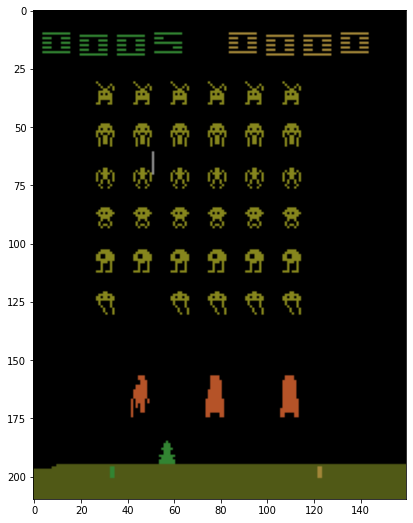

In [12]:
# import the wrapper  and the display function
import gym
from gym import wrappers
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# setup the environment
env = gym.make('SpaceInvaders-v0')
# pass it to wrapper class
env = wrappers.Monitor(env, "./gym-results", force=True)

# reset the environment
env.reset()
plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array')) # only call this once

# run it for a range of steps
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
env.close()

In [19]:
# lets open and look at the video saved in our system while running the previous tab

# import lib to display
from IPython.display import Video

#locate the file
Video("gym-results/openaigym.video.0.3232.video000000.mp4")